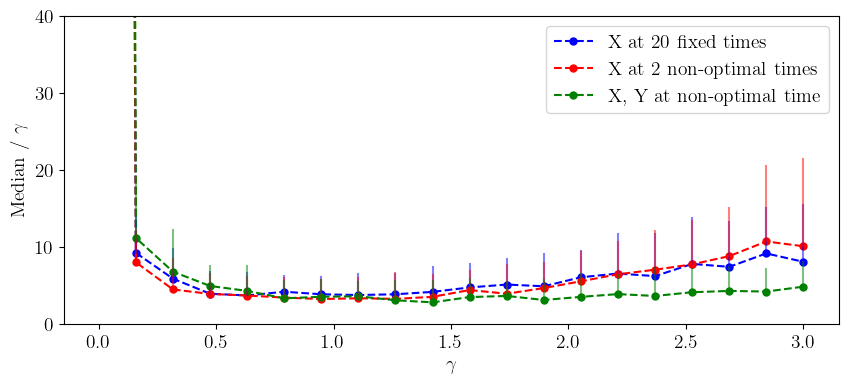

In [4]:
import numpy as np
import pandas as pd

Decay = np.linspace(0.001, 3, 20)

# Load the Excel file
loaded_df = pd.read_excel('C:\\Projects\\Crosstalk\\data_for_paper/stability-Decay.xlsx')

# Assign the columns to variables
shots = loaded_df["shots"].values
errors_fisher_median = loaded_df["errors_fisher_median"].values
errors_fisher_75th_percentile = loaded_df["errors_fisher_75th_percentile"].values
errors_local_median = loaded_df["errors_local_median"].values
errors_local_75th_percentile = loaded_df["errors_local_75th_percentile"].values
errors_uniform_median = loaded_df["errors_uniform_median"].values
errors_uniform_75th_percentile = loaded_df["errors_uniform_75th_percentile"].values

#############

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))  # Adjust the figure size to make the plot longer
plt.rcParams['text.usetex'] = True
font = {'family': 'normal',
        'weight': 'bold',
        'size': 14}

plt.rc('font', **font)
plt.plot(Decay, 100 * np.array(errors_uniform_median / Decay), linestyle='--', marker='o', color='blue', markersize=5,
         label='X at 20 fixed times')
plt.plot(Decay, 100 * np.array(errors_fisher_median / Decay), linestyle='--', marker='o', color='red', markersize=5,
         label='X at 2 non-optimal times')
plt.plot(Decay, 100 * np.array(errors_local_median / Decay), linestyle='--', marker='o', color='green', markersize=5,
         label='X, Y at non-optimal time')

# plt.errorbar(Decay, 100 * np.array(errors_uniform_median / Decay), yerr=100 * np.array(errors_uniform_std/Decay ),
#              fmt='o', color='blue')
# plt.errorbar(Decay, 100 * np.array(errors_fisher_median / Decay), yerr=100 * np.array(errors_fisher_std/Decay ),
#              fmt='o', color='red')
# plt.errorbar(Decay, 100 * np.array(errors_local_median / Decay), yerr=100 * np.array(errors_local_std/Decay ), fmt='o',
#              color='green')

# Add lines connecting median to 75th percentile for each dataset
for i, decay_value in enumerate(Decay):
    # Uniform
    plt.plot([decay_value, decay_value],
             [100 * errors_uniform_median[i] / decay_value, 100 * errors_uniform_75th_percentile[i] / decay_value],
             color='blue', linestyle='-', alpha=0.5)

    # Fisher
    plt.plot([decay_value, decay_value],
             [100 * errors_fisher_median[i] / decay_value, 100 * errors_fisher_75th_percentile[i] / decay_value],
             color='red', linestyle='-', alpha=0.5)

    # Local
    plt.plot([decay_value, decay_value],
             [100 * errors_local_median[i] / decay_value, 100 * errors_local_75th_percentile[i] / decay_value],
             color='green', linestyle='-', alpha=0.5)

# Scatter points for 75th percentiles
# plt.scatter(Decay, 100 * np.array(errors_uniform_75th_percentile / Decay), color='blue', alpha=0.5)
# plt.scatter(Decay, 100 * np.array(errors_fisher_75th_percentile / Decay), color='red', alpha=0.5)
# plt.scatter(Decay, 100 * np.array(errors_local_75th_percentile / Decay), color='green', alpha=0.5)



# plt.title(f'Shots={Decay} ')
plt.xlabel('$\gamma$')
plt.ylabel('Median / $\gamma$')
plt.grid()
# plt.yscale('log')
# plt.xscale('log')
plt.ylim([0, 40])
plt.grid()
plt.legend()

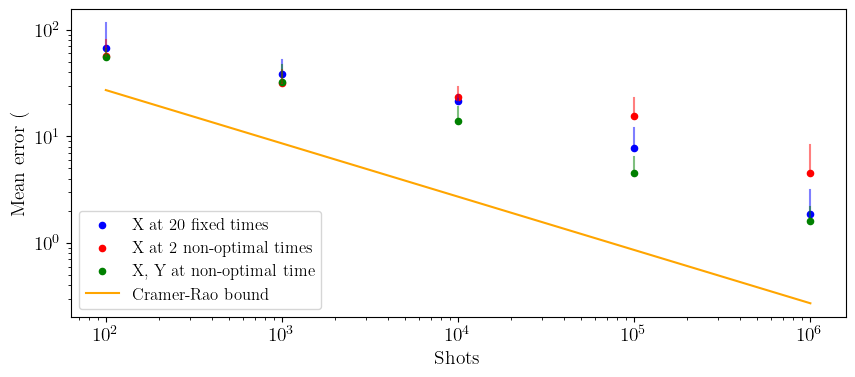

In [11]:
import numpy as np
import pandas as pd
###W = decay = 1
Decay = np.linspace(0.001, 3, 20)

# Load the Excel file
loaded_df = pd.read_excel('C:\\Projects\\Crosstalk\\data_for_paper/errors_non_optimal.xlsx')

# Assign the columns to variables
shots = loaded_df["shots"].values
errors_fisher_median = loaded_df["errors_fisher_median"].values
errors_fisher_75th_percentile = loaded_df["errors_fisher_75th_percentile"].values
errors_local_median = loaded_df["errors_local_median"].values
errors_local_75th_percentile = loaded_df["errors_local_75th_percentile"].values
errors_uniform_median = loaded_df["errors_uniform_median"].values
errors_uniform_75th_percentile = loaded_df["errors_uniform_75th_percentile"].values

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.rcParams['text.usetex'] = True
font = {'family': 'normal',
        'weight': 'bold',
        'size': 14}# Adjust the figure size to make the plot longer


plt.rc('font', **font)
plt.scatter(shots, 100 * np.array(errors_uniform_median), color='blue', s=20,
         label='X at 20 fixed times')
plt.scatter(shots, 100 * np.array(errors_fisher_median), color='red', s=20,
         label='X at 2 non-optimal times')
plt.scatter(shots, 100 * np.array(errors_local_median), color='green', s=20,
         label='X, Y at non-optimal time')

# Add lines connecting median to 75th percentile for each dataset
for i, s in enumerate(shots):
    # Uniform
    plt.plot([s, s],
             [100 * errors_uniform_median[i], 100 * errors_uniform_75th_percentile[i]],
             color='blue', linestyle='-', alpha=0.5)

    # Fisher
    plt.plot([s, s],
             [100 * errors_fisher_median[i], 100 * errors_fisher_75th_percentile[i] ],
             color='red', linestyle='-', alpha=0.5)

    # Local
    plt.plot([s, s],
             [100 * errors_local_median[i] , 100 * errors_local_75th_percentile[i] ],
             color='green', linestyle='-', alpha=0.5)


# plt.errorbar(shots, 100*np.array(errors_uniform_median), yerr=100*np.array(errors_uniform_std), fmt='o', capsize=5, ecolor='lightblue', elinewidth=3, markerfacecolor='blue', markersize=5, label='Uniformly spread out X,Y measurements')
#
# plt.errorbar(shots, 100*np.array(errors_fisher_median), yerr=100*np.array(errors_fisher_std), fmt='o', capsize=5, ecolor='peachpuff', elinewidth=3, color='red', markersize=5, label='X at 2 optimal times', alpha=0.7)
#
# plt.errorbar(shots, 100*np.array(errors_local_median), yerr=100*np.array(errors_local_std), fmt='o', capsize=5, ecolor='lightgreen', elinewidth=3, color='green', markersize=5, label='X, Y at optimal time', alpha=0.7)

# Shots_2q = [100, 1000, 10000, 100000, 1000000]
# Errors_2q = [50.530481, 18.415648, 7.961954, 6.401243, 6.696693]
# plt.plot(Shots_2q, Errors_2q, linestyle='', marker='o', color='blue', markersize=5, label='2 qubits')
# shots3q=[10000]
# errors3q=[5.809173305]
# plt.plot(shots3q, errors3q, linestyle='', marker='o', color='red', markersize=5, label='More data')
# plt.title(f'Error vs shots W={W} Decay={Decay} ')
# plt.title(f'{n} qubits')
plt.plot(shots, 100*np.e/ np.sqrt(shots), '-', label='Cramer-Rao bound', color = 'orange')
plt.xlabel('Shots')
plt.ylabel('Mean error (%)')
plt.yscale('log')
plt.xscale('log')
# plt.grid()

plt.rcParams['lines.markersize'] = 10
# Example size for markers
plt.rcParams['font.size'] = 12         # Example size for font

plt.legend()